# 9. Local Features - Corner Detections

In [40]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


def display_image(img, title=""):
    plt.figure()
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis("off")
    plt.show()

**a)** Use the Harris corner detector to detect the corners in one or more images of your choice. Try different
parameters, namely, neighborhood size, aperture for the Sobel operator and Harris detector free parameter

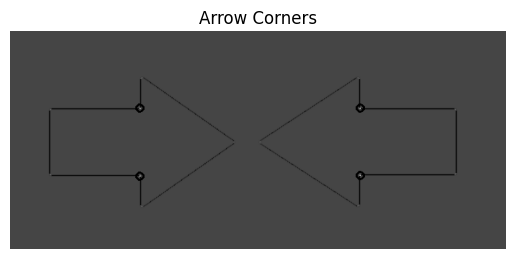

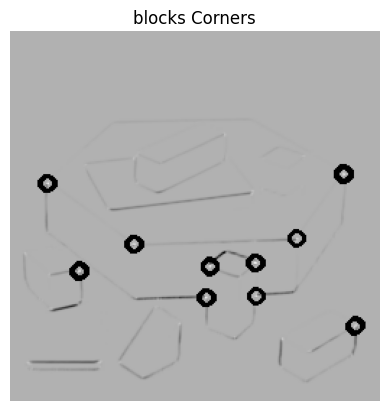

In [52]:
ARROW_IMAGE_PATH = "../../images/corners_01.jpg"
BLOCKS_IMAGE_PATH = "../../images/corners_blocks.jpg"

arrow_image = cv2.imread(ARROW_IMAGE_PATH)
arrow_image_gray = cv2.cvtColor(arrow_image, cv2.COLOR_BGR2GRAY)

blocks_image = cv2.imread(BLOCKS_IMAGE_PATH)
blocks_image_gray = cv2.cvtColor(blocks_image, cv2.COLOR_BGR2GRAY)

THRESH = 200
BLOCK_SIZE = 2
APERTURE_SIZE = 3
K = 0.04


def corners_harris(image_gray):
    corners = cv2.cornerHarris(image_gray, BLOCK_SIZE, APERTURE_SIZE, K)
    corners_norm = np.empty(corners.shape, dtype=np.float32)
    cv2.normalize(corners, corners_norm, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
    corners_norm_scaled = cv2.convertScaleAbs(corners_norm)

    for i in range(corners_norm.shape[0]):
        for j in range(corners_norm.shape[1]):
            if int(corners_norm[i, j]) > THRESH:
                cv2.circle(corners_norm_scaled, (j, i), 5, (0), 2)

    return corners_norm_scaled


arrow_corners = corners_harris(arrow_image_gray)
display_image(arrow_corners, "Arrow Corners")

blocks_corners = corners_harris(blocks_image_gray)
display_image(blocks_corners, "blocks Corners")

**b)** Use the Shi-Tomasi corner detector to detect the corners in the same images. 
Try different parameters, namely, block size, and aperture for the Sobel operator;
compare the results with those of Harr is detector for the equivalent parameters;
notice that the Shi-Tomasi implementation has more parameters than Harris
implementation.

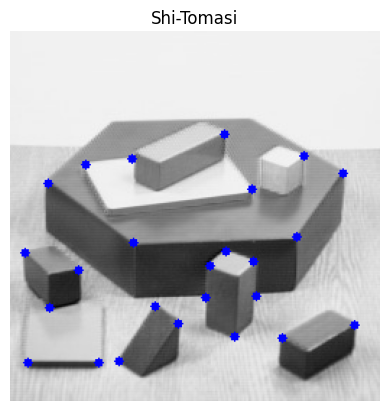

In [55]:
blocks_corners = cv2.goodFeaturesToTrack(blocks_image_gray, 25, 0.01, 10)
blocks_corners = np.int0(blocks_corners)

for i in blocks_corners:
    x, y = i.ravel()
    cv2.circle(blocks_image, (x, y), 3, 255, -1)

display_image(blocks_image, "Shi-Tomasi")

**c)** Use the FAST corner detector to detect the corners in the same images.

Threshold: 10
nonmaxSuppression:True
neighborhood: 2
Total Keypoints with nonmaxSuppression: 453


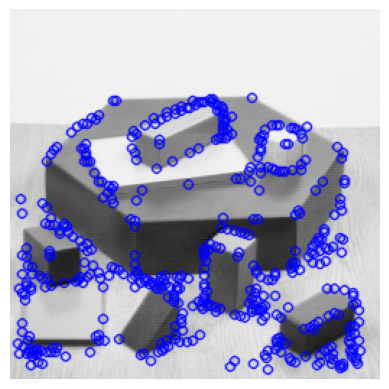

In [57]:
fast = cv2.FastFeatureDetector_create()

keypoints = fast.detect(blocks_image_gray, None)
blocks_keypoints = cv2.drawKeypoints(
    blocks_image_gray, keypoints, None, color=(255, 0, 0)
)

print("Threshold: {}".format(fast.getThreshold()))
print("nonmaxSuppression:{}".format(fast.getNonmaxSuppression()))
print("neighborhood: {}".format(fast.getType()))
print("Total Keypoints with nonmaxSuppression: {}".format(len(keypoints)))

display_image(blocks_keypoints)

**d)** Resize the images, downsizing them to 1/4 of the original size and reapply all the corner detectors. Compare the
results with each other and with those that you have obtained previously

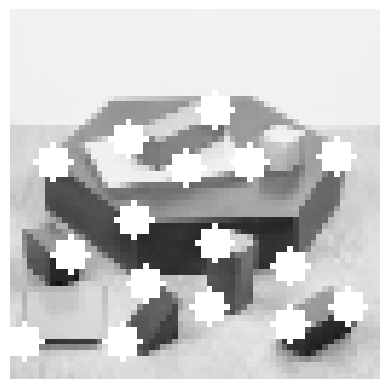

In [64]:
width = int(blocks_image_gray.shape[1] * 25 / 100)
height = int(blocks_image_gray.shape[0] * 25 / 100)
dim = (width, height)
blocks_resized = cv2.resize(blocks_image_gray, dim)

blocks_corners = cv2.goodFeaturesToTrack(blocks_resized, 25, 0.01, 10)
blocks_corners = np.int0(blocks_corners)

for i in blocks_corners:
    x, y = i.ravel()
    cv2.circle(blocks_resized, (x, y), 3, 255, -1)


display_image(blocks_resized)